## PCA
Basic Example of Principal Component Analysis (PCA) Implementation

## About the data


The dataset has 9 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

1. mpg: miles per gallon
2. cylinders: number of cylinders
3. displacement: engine displacement in cubic inches
4. horsepower: horsepower of the car
5. weight: weight of the car in pounds
6. acceleration: time taken, in seconds, to accelerate from O to 60 mph
7. model year: year of manufacture of the car (modulo 100)
8. origin: region of origin of the car (1 - American, 2 - European, 3 - Asian)
9. car name: name of the car


## 1. Importing Libraries

In [1]:
# data handling and formating
import pandas as pd
import numpy as np

# vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for progress bar
from tqdm import tqdm

# importing KMeans method for clustering
from sklearn.cluster import KMeans

# importing PCA for dimensionality reduction
from sklearn.decomposition import PCA

# scaling data
from sklearn.preprocessing import MinMaxScaler

# to compute distances
from scipy.spatial.distance import cdist

# supressing warnings
import warnings
warnings.simplefilter('ignore')

## 2. Data Load & Overview

In [2]:
# Importing data
data = pd.read_csv('../Data/auto_mpg.csv')

In [3]:
# creating a copy of the data to avoid permanent changes
df = data.copy()

In [4]:
# checking the size of the dataframe
print(f'This data set has {df.shape[0]} rows')
print(f'There are {df.shape[1]} variables')

This data set has 398 rows
There are 9 variables


In [5]:
# looking at first 5 rows of the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


This dataset contains features of different cars

In [6]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


* Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
* The horsepower and car name columns are string columns ('object' type)
* From the data above we know that horsepower should be numeric.

## 2. Data Preprocessing

* handle categorical variables by dropping/transforming them
* handle missing values
* scale data

In [7]:
# dropping categorical columns for simplicity
df.drop(['car name','model year','origin'],axis=1, inplace=True)

In [8]:
# finding all unconvertible strings in the 'horsepower' column
strings = [ string for string in df['horsepower'] if string.isdigit() == False]
strings

['?', '?', '?', '?', '?', '?']

In [9]:
# replacing the '?' strings with None types
df['horsepower'] = np.where(df['horsepower'] == '?',None,df['horsepower'])

In [10]:
# creating a method to fill the None types with the median
medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis=0)

In [11]:
# let's convert the horsepower column from object type to float type
df.horsepower = df.horsepower.astype(float)

In [12]:
# looking at final dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


For better results in PCA it is necessary to work with scaled data

In [13]:
# defining scaler
scaler = MinMaxScaler()
# creating new dataset with scaled values
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled_pca = df_scaled.copy()

We will use the elbow plot to estimate the best number of clusters to use

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.15it/s]


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

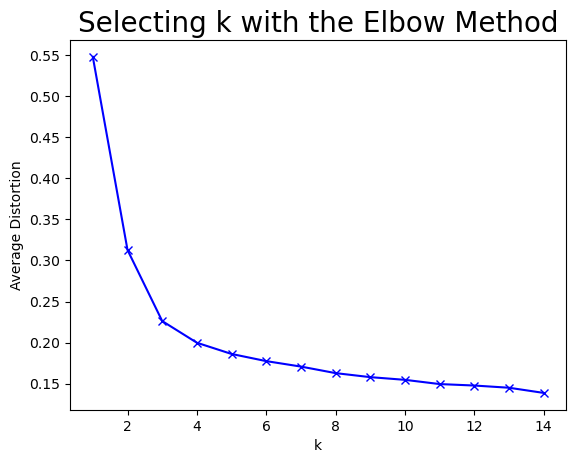

In [14]:
# number of clusters to test
clusters = range(1, 15)

# empty list to store mean dissortion
meanDistortions = []

# looping through different number of clusters
for k in tqdm(clusters):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(
            np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

# creating elbow plot
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

From the elbow plot we will use 3 as the number of clusters

In [15]:
# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the dataframe
df_scaled['cluster'] = list(clusters)

## 4. PCA

We will use PCA to reduce the dimensionality to 2 components for better visualization of clusters

In [16]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df_scaled_pca)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [17]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.9218738837681049

Two components account for 92.19% of the variance in the data

In [18]:
pca.explained_variance_ratio_

array([0.8586298 , 0.06324408])

* The first component accounts for 85.86% of the variance of the data
* The second compnent accounts for 6.32% of the variance of the data

In [19]:
# looking at the components structure
comp = pd.DataFrame(pca.components_.T,
                    columns=['Component 1','Component 2'],
                    index=df_scaled_pca.columns)

comp

,Component 1,Component 2
mpg,-0.320705,-0.167853
cylinders,0.594135,0.159519
displacement,0.476562,0.026308
horsepower,0.345169,-0.345685
weight,0.411369,0.257197
acceleration,-0.169337,0.871802


Observations:

* It seems like the first component gives the most importance to:
  - `cylinders`, `displacement`, and `weight` 
* The second component gives the most imortance to:
    - `acceleration` and `horsepower` 

<Axes: xlabel='Component 1', ylabel='Component 2'>

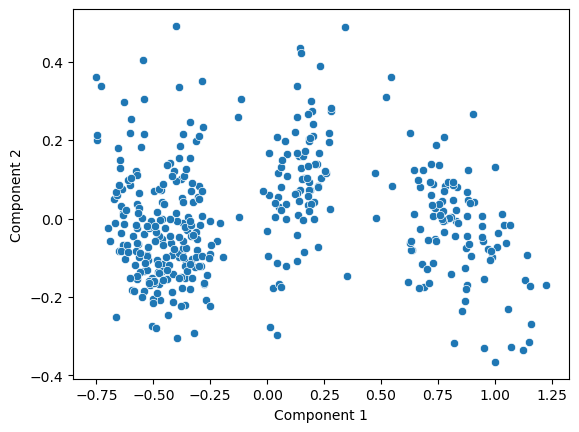

In [20]:
# plotting both components
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

Now we will apply the clusters from Kmeans to see how well spaced the clusters are from eachother after performing Principal Component Analysis

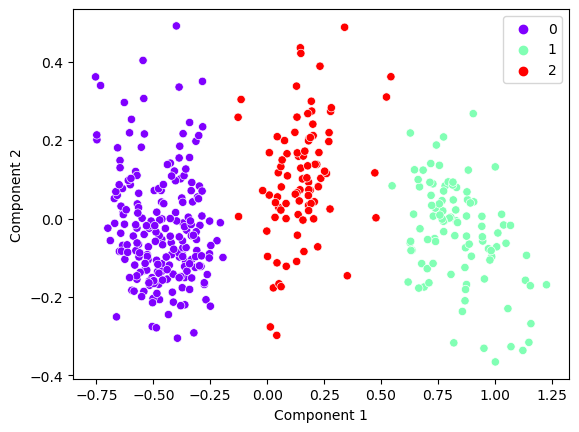

In [21]:
# plotting both components with their corresponding clusters
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_scaled["cluster"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

It seems like PCA was able to capture the different clusters very accurately,

* from the clusters formed it seems like component 2 does not affect the clusters' structures
* component 1 is the determining factor when deciding the clusters